In [246]:
import pandas as pd 

In [248]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [250]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1362,Toyota Innova 2.5 VX (Diesel) 7 Seater,2015,1200000,70000,Diesel,Individual,Manual,Third Owner
572,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
2687,Tata Tiago 1.2 Revotron XZ,2018,500000,30000,Petrol,Individual,Manual,First Owner
2780,Maruti Esteem Lxi - BSIII,2006,90000,90000,Petrol,Individual,Manual,First Owner
921,Maruti SX4 Vxi BSIV,2012,225000,110000,Petrol,Individual,Manual,Second Owner


In [252]:
df.shape

(4340, 8)

# Exploratory Data Analysis (EDA)

In [254]:
df.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [256]:
df.name.str.split().str[0] .unique() 

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [258]:
df.name.str.split().str[0] .unique() .shape

(29,)

In [260]:
df1=df 
df1['brand'] = df.name.str.split().str[0]

In [262]:
df1.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
2516,Hyundai EON Sportz,2012,150000,55766,Petrol,Individual,Manual,Second Owner,Hyundai
1738,Hyundai Santro Xing GL Plus,2008,120000,41723,Petrol,Individual,Manual,Second Owner,Hyundai


In [264]:
def uniqueInDf(df):
    for column in df :
        if(column== 'selling_price' or column== 'km_driven') :
            continue 
        print(f'{column} : {df[column].unique()}')

In [265]:
uniqueInDf(df)  

name : ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
year : [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission : ['Manual' 'Automatic']
owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
brand : ['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [268]:
brand_count = df1['brand'].value_counts()
brand_count 

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [270]:
import matplotlib.pyplot as plt

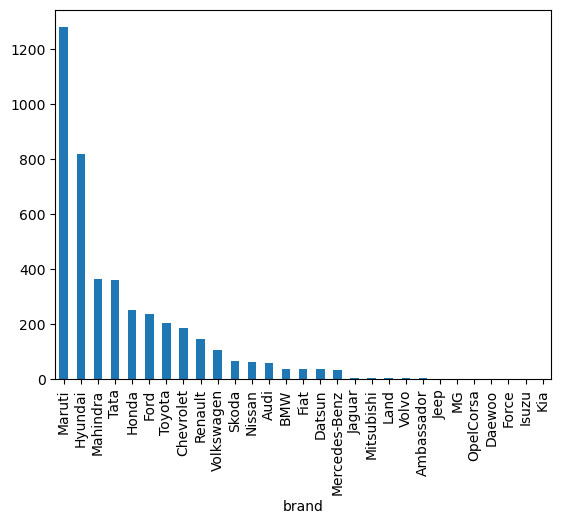

In [272]:
brand_count.plot(kind = 'bar')
plt.show()

In [273]:
df1.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
3264,Chevrolet Beat Diesel LS,2012,120000,110000,Diesel,Individual,Manual,First Owner,Chevrolet
2563,Hyundai i20 Asta (o),2014,525000,54000,Petrol,Dealer,Manual,Second Owner,Hyundai


In [274]:
df1.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
brand            object
dtype: object

In [278]:
df1 = df1.drop('name' , axis='columns')

In [280]:
df1.sample(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
344,2006,229999,200000,Diesel,Individual,Manual,Third Owner,Mahindra
1870,2015,220000,40000,Petrol,Individual,Manual,First Owner,Maruti


In [282]:
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns
non_numeric_columns 

Index(['fuel', 'seller_type', 'transmission', 'owner', 'brand'], dtype='object')

In [284]:
df2=df1
for col in  non_numeric_columns :
    df2[col]= df2[col].astype('category').cat.codes
df2.sample(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
3448,2019,1900000,20000,1,1,1,0,26
1534,2016,575000,50000,1,1,1,0,18


In [286]:
correlation_matrix = df2.corr()
correlation = correlation_matrix['selling_price'].sort_values(ascending=False)
correlation

selling_price    1.000000
year             0.413922
brand           -0.096858
seller_type     -0.151554
km_driven       -0.192289
owner           -0.207840
fuel            -0.269653
transmission    -0.530205
Name: selling_price, dtype: float64

<Axes: >

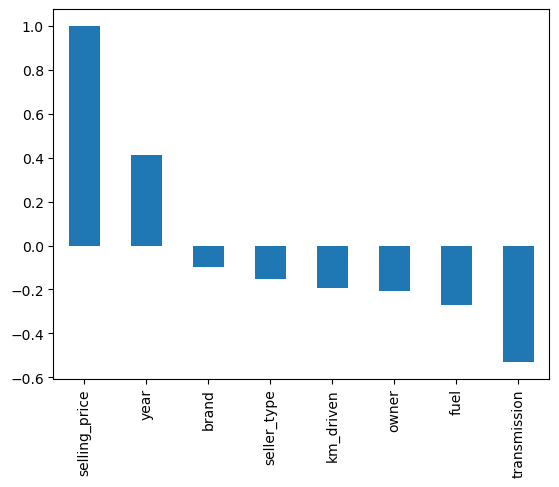

In [288]:
correlation.plot(kind = 'bar')

In [289]:
df1.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
brand            0
dtype: int64

# Preprocess the Data:

In [292]:
df3 = df1 
df3 = pd.get_dummies(df3, columns=non_numeric_columns, drop_first=True)
df3.sample(3)

,year,selling_price,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,transmission_1,...,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28
2329,2018,680000,48600,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2194,2004,142000,73000,False,False,False,True,True,False,True,...,False,False,False,True,False,False,False,False,False,False
3143,2017,425000,36000,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [298]:
df3.replace({True:1 , False:0} , inplace =True)
df3.sample(3)

,year,selling_price,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,transmission_1,...,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28
3249,2016,475000,90000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
893,2006,90000,120000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3099,2016,600000,72000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [310]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colToScale = ['year' , 'km_driven']
df3[colToScale] = scaler.fit_transform(df3[colToScale])

In [312]:
df3.sample(3)

,year,selling_price,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,transmission_1,...,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28
1556,0.714286,700000,0.012397,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3081,0.535714,100000,0.210761,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3645,0.500000,95000,0.136374,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Applying Linear Regression:

In [320]:
X = df3.drop('selling_price' , axis = 'columns')
y = df3['selling_price']

In [322]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test = train_test_split(X , y , test_size=0.2 )

In [324]:
X_train.shape 

(3472, 41)

In [326]:
X_test.shape

(868, 41)

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [332]:
model = LinearRegression()
model.fit(X_train , y_train )

LinearRegression()

In [334]:
y_pred = model.predict(X_test)

In [336]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [338]:
mse

68247181397.408195

In [360]:
r2

0.7488386521622422

In [362]:
X_test.sample(1)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,transmission_1,owner_1,...,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28
3138,0.607143,0.148772,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## KEY OBSERVATIONS
### Maruti is the most common brand 
### Year and Transmission are most strongly correlated with the selling price


<Axes: xlabel='brand'>

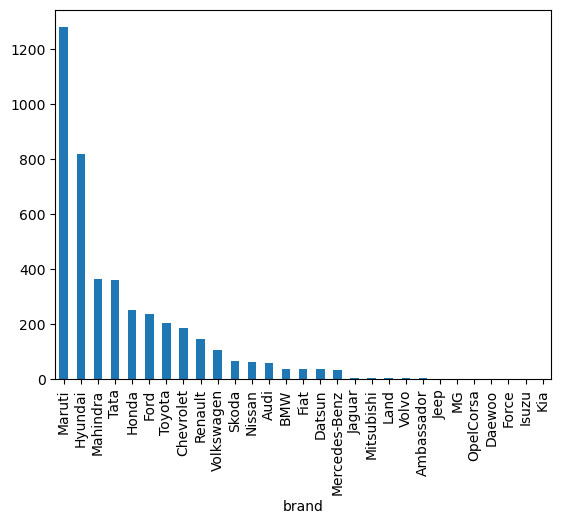

In [374]:
brand_count.plot(kind = 'bar')

<Axes: >

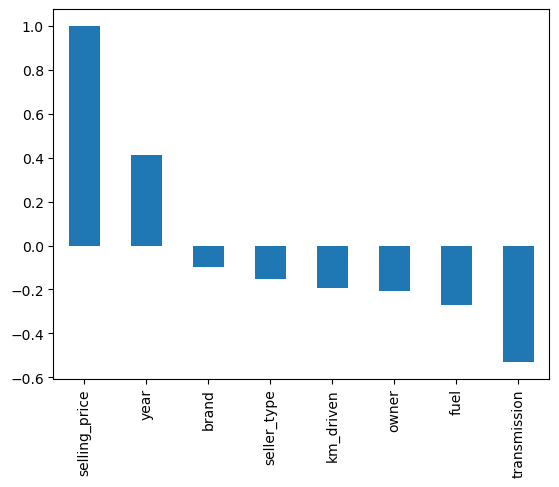

In [376]:
correlation.plot(kind = 'bar')

# perprocessing
#### converted the categorical columns to one hot encoded vector
#### scaled year and km_driven by using MinMaxScaler